In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=3,  random_state=23) 
# 3 cluster with 1000 points each

In [4]:
X.shape

(1000, 2)

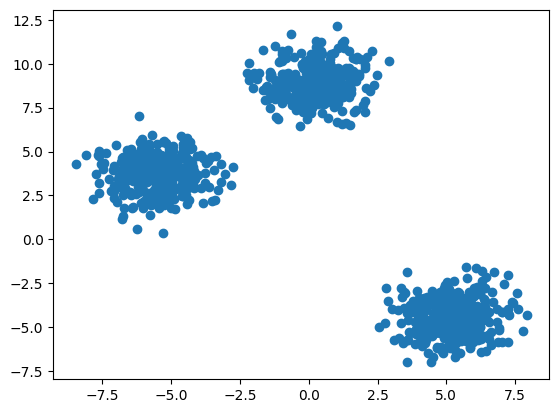

In [5]:
plt.scatter(X[:,0], X[:,1])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  

X_test.shape # 330
X_train.shape # 670

(670, 2)

In [7]:
from sklearn.cluster import KMeans

In [8]:
## Manual Process
## Elbow Method to select the k value

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[34827.57682552023,
 7935.437286145421,
 1319.2730531585605,
 1171.4379638359776,
 1032.8699289090662,
 933.8697077623267,
 771.3707253542912,
 667.8571239137846,
 621.8307200494332,
 593.1366048026193]

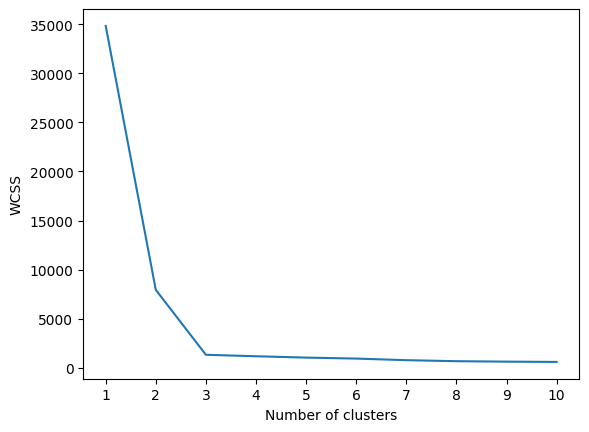

In [10]:
# plot elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

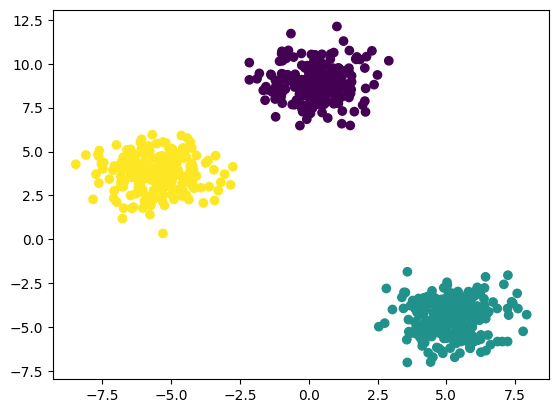

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++')
y_labels = kmeans.fit_predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1], c=y_labels)


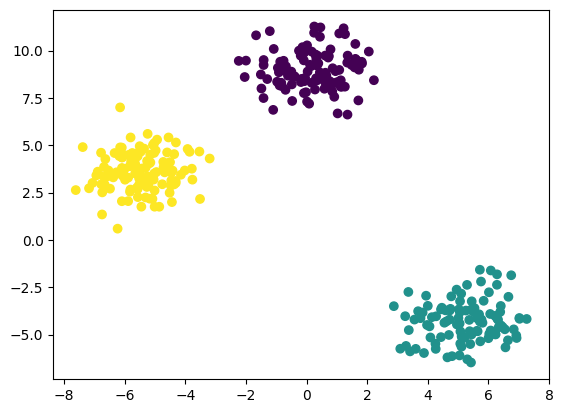

In [18]:
y_test_labels = kmeans.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test_labels)

In [ ]:
#for validation we use sillhouette_score

from sklearn.metrics import silhouette_score
silhouette_score(X_train, y_labels) # range -1 to 1, more is better


np.float64(0.8071181203797673)

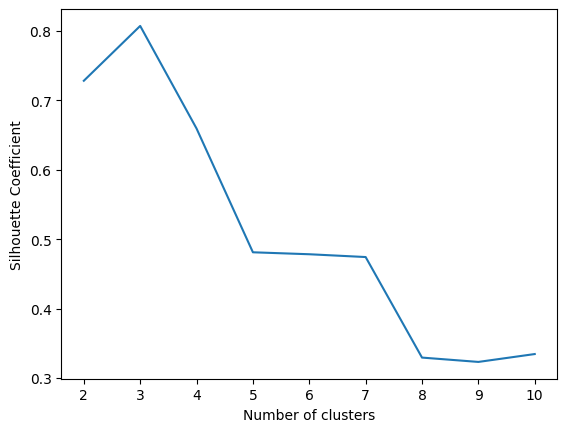

In [22]:
# manual silhorette score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

# range -1 to 1, more is better

silhouette_coefficient = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficient.append(score)

silhouette_coefficient

# plotting silhouette coefficient
plt.plot(range(2, 11), silhouette_coefficient)
plt.xticks(range(2, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()